# **Análisis de los casos positivos de COVID-19 en Colombia**

In [ ]:
!pip install -q geopandas==0.9.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110   

# Entendimiento del negocio

Durante el año 2020 debido a la pandemia de COVID-19, en Colombia se sometió a la población a diferentes medidas preventivas para mitigar la propagación del virus entre ellas el aislamiento obligatorio que rigió desde marzo de ese año y se extendió hasta el 31 de agosto del mismo año, y el uso obligatorio del tapabocas. Estas medidas se han venido modificando hasta la actualidad. El 13 de marzo de 2021, en Colombia, se administró la primera dosis y para el 29 de abril del año 2022, 82.7% de la población tenía al menos una dosis y el 69.6% tenía el esquema completo de vacunación, según las estadísticas provistas por Our World in Dat.

En este punto es necesario estudiar las relaciones entre las características de la población contagiada con el fin de determinar factores de contagio, poblaciones vulnerables y comparaciones de los resultados en los diferentes sectores de la población, para evaluar las medidas que han sido tomadas por el gobierno y las autoridades responsables y proponer medidas eficaces para reducir los riesgos de contagio y de muerte en los individuos.








> **Objetivo**
 
Con el fin de analizar la relación entre algunas de las características de la población colombiana, realizar comparaciones entre los diferentes sectores de la población para identificar características de riesgo y proponer medidas que se acoplen a estos hallazgos. Se emplearon los datos abiertos de casos positivos de contagio publicados por el Ministerio de tecnologías de la información y comunicaciones durante el periodo entre el 3 de abril del año 2021 y el 2 de mayo del año 2022.




A continuación se cargarán los datos anteriormente mencionados, dispuestos en un repositorio de github, seguidos de las cinco primeras filas que se encuentran en el conjunto de datos, cada fila corresponde a un caso en el que se haya identificado un individuo contagiado de COVID.

In [ ]:
url = 'https://github.com/SlimShady9/dataset/raw/main/Casos_positivos_de_COVID-19_en_Colombia.csv'
covidco_cpo = pd.read_csv(url)


covidco_cpo.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN
2,2021-03-04 00:00:00,2265687,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,NaN,NaN,Recuperado,2021-02-24 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN
3,2021-03-04 00:00:00,2265688,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,NaN,NaN,Recuperado,2021-02-27 00:00:00,NaN,2021-03-03 00:00:00,2021-03-13 00:00:00,Tiempo,6,NaN
4,2021-03-04 00:00:00,2265689,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,NaN,NaN,Recuperado,2021-03-01 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN


Y a continuación se observan las filas correspondientes a los últimos cinco casos registrados en el conjunto de datos.

In [ ]:
covidco_cpo.tail()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
6304312,2022-02-05 00:00:00,5956386,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,47,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6,NaN
6304313,2022-02-05 00:00:00,5956387,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,39,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6,NaN
6304314,2022-02-05 00:00:00,5956388,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,35,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6,NaN
6304315,2022-02-05 00:00:00,5956389,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,11,1,M,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6,NaN
6304316,2022-02-05 00:00:00,5956390,2022-01-19 00:00:00,50,META,50001,VILLAVICENCIO,34,1,F,...,NaN,NaN,Recuperado,2022-01-15 00:00:00,NaN,2022-01-30 00:00:00,2022-02-06 00:00:00,Tiempo,6,NaN


La información en cada una de las columnas corresponde a las características individuales de cada caso, entre las que están la edad, sexo, ubicación geográfica del caso, pertenencia étnica, entre otras. Estas características se pueden leer en la siguiente celda.

In [ ]:
covidco_cpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304317 entries, 0 to 6304316
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

# Entendimiento de los datos

**Pertenencia étnica de los contagiados**




La pertenencia étnica del individuo se clasifica con un npumero del uno al seis donde el 1 corresponde a Indígena, 2 a ROM, 3 a Raizal, 4 a Palenquero, 5 a Negro y 6 a otro. Como se puede ver a continuación, el grueso de la población contagiada en Colombia tiene el número 6 asignado en pertenencia étnica, es decir no tienen una pertenencia étnica definida debido a que estos son grupos minoritarios. 

In [ ]:
etnias = covidco_cpo['Pertenencia étnica'].value_counts()
etnias

6    6082832
5     137547
1      83395
3        405
2        138
Name: Pertenencia étnica, dtype: int64

En la siguiente celda se observa un histograma en el que es posible visualizar la proporción de las pertenencias étnicas respecto al total de casos.


Text(0.5, 1.0, 'Casos positivos de Covid')

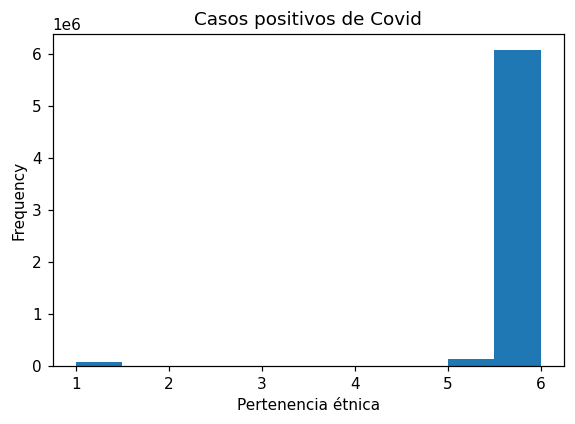

In [ ]:
ax_etn = covidco_cpo['Pertenencia étnica'].plot.hist()
ax_etn.set_xlabel('Pertenencia étnica')
ax_etn.set_title('Casos positivos de Covid')

**Número de recuperados, fallecidos y activos**

Para determinar el número de recuperados, fallecidos y activos registrados, se implementa una función que retorne la variable ‘Recuperado’ en mayúsculas y sin espacios, dándole uniformidad a la forma de los datos registrados y de esta manera poder obtener una mejor descripción de la población.


In [ ]:
def mayuscula(estado):
  # Implemente esta función: debe retornar la última palabra, 
  # separando por espacio de la cadena "name" dada. 
  mayusculas = estado.upper()
  estado_mayus = mayusculas.split()
  return estado_mayus[-1]


estado_contagiados = covidco_cpo['Recuperado'].astype(str).apply(lambda x: mayuscula(x)).value_counts()

estado_contagiados

RECUPERADO    6131248
FALLECIDO      141708
NAN             27732
ACTIVO           3629
Name: Recuperado, dtype: int64

**Tipo de contagio**

También es posible conocer la proporción de casos en cada tipo de contagio (Comunitario, relacionado o importado).

In [ ]:
tipo_contagio = covidco_cpo['Tipo de contagio'].value_counts()
tipo_contagio

Comunitaria    4364386
Relacionado    1936232
Importado         3696
Comunitario          3
Name: Tipo de contagio, dtype: int64

 **Gravedad del contagio**

Así como los casos en cada grado de gravedad, como se muestra (Leve, moderado, grave o fallecido) en seguida, en donde se empleo nuevamente la función 'mayuscula' para dar uniformidad al formato en el que estan registrados.

In [ ]:
levedad = covidco_cpo['Estado'].astype(str).apply(lambda x: mayuscula(x)).value_counts()
levedad

LEVE         6128242
FALLECIDO     141708
NAN            32315
MODERADO        1836
GRAVE            216
Name: Estado, dtype: int64

**Tipo de recuperación**

En la variable del conjunto de datos denominada ‘Tipo de recuperación’ se puede encontrar almacenada dos opciones. La primera, PCR, hace referencia a un individuo que se ha recuperado por segunda muestra, en la que el individuo ha salido negativo. Y la segunda, Tiempo, que caracteriza a la población que cumplió 30 días después de los primeros síntomas o toma de muestras sin síntomas, menor a setenta años y no hospitalizados.

In [ ]:
tipo_recuperacion = covidco_cpo['Tipo de recuperación'].value_counts()
tipo_recuperacion

Tiempo    5198212
PCR        933036
Name: Tipo de recuperación, dtype: int64

 **Edades en los casos positivos de COVID-19**

La variable 'Edad' almacena las edades de los individuos registrados como contagiados, de esta se pueden obtener medidas de estadística descriptiva que describan la población.

In [ ]:
edad_desc = covidco_cpo['Edad'].describe()
edad_desc

count    6.304317e+06
mean     3.990681e+01
std      1.835493e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.800000e+01
75%      5.200000e+01
max      1.140000e+02
Name: Edad, dtype: float64

In [ ]:
covidco_cpo['Edad'].mode()

0    30
dtype: int64

Donde el promedio de edad de los contagiados es 39.9 años, la desviación estándar que describe la dispersión de las edades en la población es de 18.4. La persona con mayor edad registrada tiene 114 años y el menor registrado tiene 1 año y la edad más común te contagio son los 30 años. 
Esto se puede observar en una representación gráfica de la distribución de la variable edad en la población contagiada mediante un histograma.


Text(0.5, 1.0, 'Casos positivos de Covid')

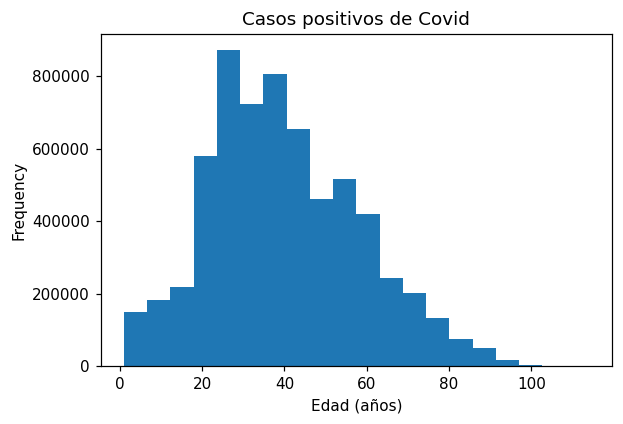

In [ ]:
ax_ed = covidco_cpo['Edad'].plot.hist(bins = 20)
ax_ed.set_xlabel('Edad (años)')
ax_ed.set_title('Casos positivos de Covid')

**Nombre del país**


En esta variable se registran únicamente los países de los que provengan los casos de individuos no colombianos. Se registran 88 nombres diferentes de países, siendo Estados Unidos el país con más casos.


In [ ]:
covidco_cpo['Nombre del país'].value_counts()

ESTADOS UNIDOS DE AMÉRICA      1415
MÉXICO                          385
ESPAÑA                          369
BRASIL                          285
VENEZUELA                       177
                               ... 
POLINESIA FRANCESA                1
MONTENEGRO                        1
REINO UNIDO                       1
CHINA                             1
REPUBLICA POPULAR DEL CONGO       1
Name: Nombre del país, Length: 88, dtype: int64

**Ubicación del caso**

En la variable 'ubicación del caso' indica si el caso registrado se encontraba en la casa, en el hospital, en la UCI o si se trataba de un individuo fallecido.

In [ ]:
ubicacion = covidco_cpo['Ubicación del caso'].astype(str).apply(lambda x: mayuscula(x)).value_counts()
ubicacion


CASA         6128242
FALLECIDO     141708
NAN            32315
HOSPITAL        1836
UCI              216
Name: Ubicación del caso, dtype: int64

# Preparación de los datos

Con el método count podemos dar cuentas de la cantidad de registros en cada una de las variables y con esto examinar si es acertado eliminar alguna de las columnas debido a que la falta datos pueda hacer de la muestra no concluyente.

In [ ]:
covidco_cpo.count()

fecha reporte web               6304317
ID de caso                      6304317
Fecha de notificación           6304317
Código DIVIPOLA departamento    6304317
Nombre departamento             6304317
Código DIVIPOLA municipio       6304317
Nombre municipio                6304317
Edad                            6304317
Unidad de medida de edad        6304317
Sexo                            6304317
Tipo de contagio                6304317
Ubicación del caso              6272002
Estado                          6272002
Código ISO del país                3702
Nombre del país                    3710
Recuperado                      6276585
Fecha de inicio de síntomas     5817584
Fecha de muerte                  174023
Fecha de diagnóstico            6301562
Fecha de recuperación           6131248
Tipo de recuperación            6131248
Pertenencia étnica              6304317
Nombre del grupo étnico           83057
dtype: int64

Algunas de las columnas con una gran cantidad de datos faltantes son las correspondientes a las de país de procedencia, sin embargo esto se debe a que esta casilla es llenada sólo en los casos en el que el individuo no sea ciudadano Colombiano. Esta misma situación se presenta con la variable correspondiente al Nombre del grupo étnico al que pertenece el individuo.

**Eliminación de los datos repetidos**

En la siguiente celda se eliminan, si es el caso, los casos repetidos, esto es, los casos con un mismo número de identificación.

In [ ]:
covidco_cpo = covidco_cpo.drop_duplicates('ID de caso')
covidco_cpo.count()

fecha reporte web               6304317
ID de caso                      6304317
Fecha de notificación           6304317
Código DIVIPOLA departamento    6304317
Nombre departamento             6304317
Código DIVIPOLA municipio       6304317
Nombre municipio                6304317
Edad                            6304317
Unidad de medida de edad        6304317
Sexo                            6304317
Tipo de contagio                6304317
Ubicación del caso              6272002
Estado                          6272002
Código ISO del país                3702
Nombre del país                    3710
Recuperado                      6276585
Fecha de inicio de síntomas     5817584
Fecha de muerte                  174023
Fecha de diagnóstico            6301562
Fecha de recuperación           6131248
Tipo de recuperación            6131248
Pertenencia étnica              6304317
Nombre del grupo étnico           83057
dtype: int64

**Selección de los datos relevantes para el proyecto**







Por último se elimina del grupo de datos aquellas variables que no serán relevantes para el estudio y análisis que se ha propuesto, como las fechas de registro, fallecimiento o recuperación.

In [ ]:
covidco_cpo.drop(columns=covidco_cpo.columns[[0, 1, 2, 4, 6, 8, 16, 17, 18, 19]], inplace=True)
covidco_cpo.count()

#,, 'ID de caso', 'Nombre departamento', 'Nombre municipio' 'Unidad de medida de edad', 'Fecha de inicio de síntomas', 'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación'

Código DIVIPOLA departamento    6304317
Código DIVIPOLA municipio       6304317
Edad                            6304317
Sexo                            6304317
Tipo de contagio                6304317
Ubicación del caso              6272002
Estado                          6272002
Código ISO del país                3702
Nombre del país                    3710
Recuperado                      6276585
Tipo de recuperación            6131248
Pertenencia étnica              6304317
Nombre del grupo étnico           83057
dtype: int64

# Análisis de los datos


**Casos de agentes recuperados y fallecidos**

En un primer lugar se hace una separación del conjunto de datos en recuperados, fallecidos y activos con el fin de analizar cada uno de los grupos.

In [ ]:
covidco_cpo_mayus = covidco_cpo
covidco_cpo_mayus['Recuperado'] = covidco_cpo['Recuperado'].astype(str).apply(lambda x: mayuscula(x))




In [ ]:
fallecidos = covidco_cpo_mayus.groupby('Recuperado').get_group('FALLECIDO')
recuperados = covidco_cpo_mayus.groupby('Recuperado').get_group('RECUPERADO')
activos = covidco_cpo_mayus.groupby('Recuperado').get_group('ACTIVO')



1.   Fallecidos







> A continuación obtenemos el promedio, desviación estandar, mínimo, máximo y otras medidas descriptivas de las edades de los casos positivos de COVID fallecidos:





In [ ]:
fallecidos['Edad'].describe()

count    141708.000000
mean         68.403181
std          15.522784
min           1.000000
25%          59.000000
50%          70.000000
75%          80.000000
max         112.000000
Name: Edad, dtype: float64

La edad promedio de la población fallecida es de 68.4 años, se observa en el histograma que representa la distribución de los casos de COVID que han fallecido, una asimetría negativa.

Text(0.5, 1.0, 'Casos positivos de Covid fallecidos')

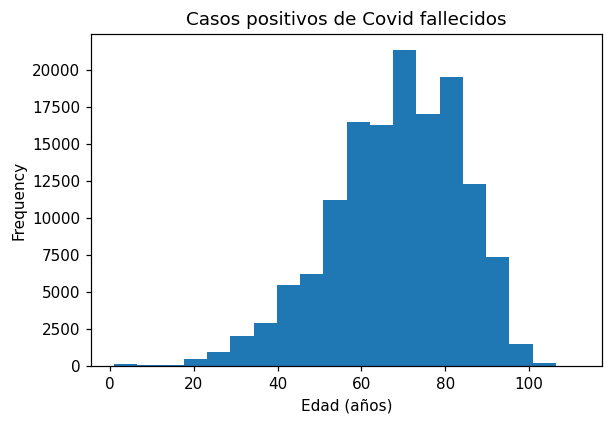

In [ ]:
ax_f = fallecidos['Edad'].plot.hist(bins = 20)
ax_f.set_xlabel('Edad (años)')
ax_f.set_title('Casos positivos de Covid fallecidos')



2.   Recuperados





> Promedio, desviación estandar, mínimo, máximo y otras medidas descriptivas de las edades de los casos positivos de COVID recuperados:



In [ ]:
recuperados['Edad'].describe()

count    6.131248e+06
mean     3.911734e+01
std      1.776283e+01
min      1.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.140000e+02
Name: Edad, dtype: float64

Por otra parte, se observa que la edad promedio de la población recuperada es de 39.1 años  y en el histograma que representa la distribución de los casos de COVID que se han recuperaod, una asimetría positiva.

Text(0.5, 1.0, 'Casos positivos de Covid recuperados')

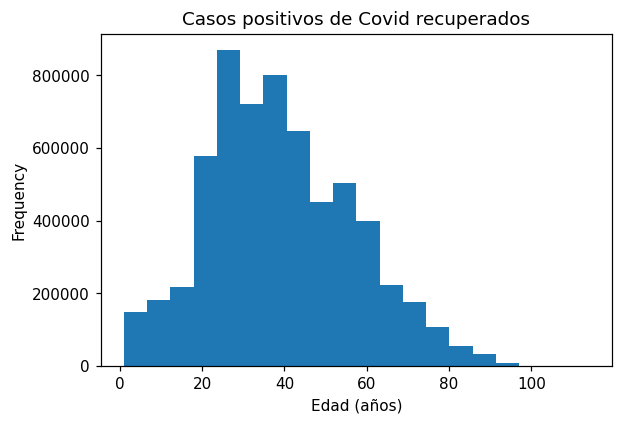

In [ ]:
ax_r = recuperados['Edad'].plot.hist(bins = 20)
ax_r.set_xlabel('Edad (años)')
ax_r.set_title('Casos positivos de Covid recuperados')

En una comparativa de las ditribuciones de las distribuciones de edades para los tres grupos se puede ver que los sectores de la población fallecidos y activos representan una porción muy pequeña de la muestra, siendo el grupo de los recuperados el 97.7% de la muestra total. Por esta razón el promedio de edad de personas contagiadas solo difiere en 0.8 años del promedio de edad de personas recuperadas.

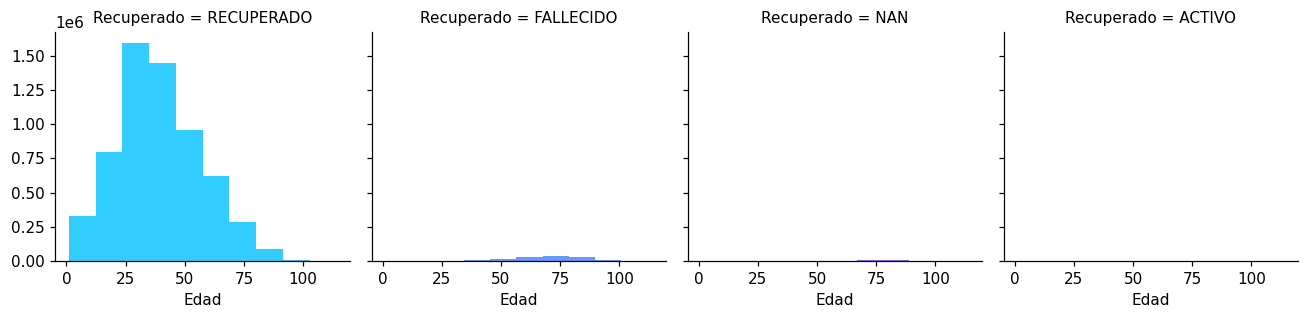

In [ ]:

estados_dist = sns.FacetGrid(covidco_cpo_mayus, col="Recuperado", hue= "Recuperado", palette = "cool")
estados_dist = estados_dist.map(plt.hist, "Edad")

**Casos masculinos y femeninos**

Entre la muestra total se registró un mayor número de individuos con sexo femenino, siendo este grupo un 53.4% de la muestra total. Sin embargo esto puede deberse a que en Colombia la población femenina es ligeramente mayor que la masculina, siendo esta el 51,2% de la población total, según datos del Ministerio de Salud del año 2019.

In [ ]:
covidco_cpo_mayusb = covidco_cpo_mayus
covidco_cpo_mayusb['Sexo'] = covidco_cpo['Sexo'].astype(str).apply(lambda x: mayuscula(x))
covidco_cpo_mayusb['Sexo'].value_counts()



F    3366616
M    2937701
Name: Sexo, dtype: int64

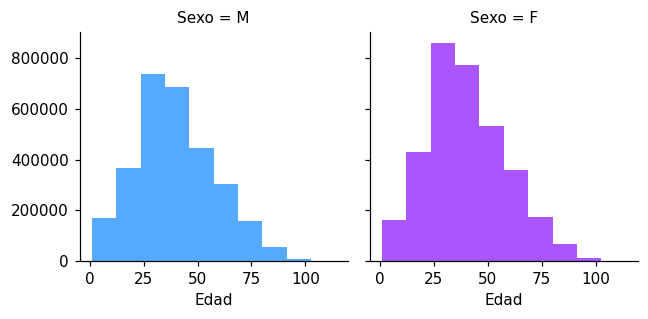

In [ ]:

sexo_dist = sns.FacetGrid(covidco_cpo_mayus, col="Sexo", hue= "Sexo", palette = "cool")
sexo_dist = sexo_dist.map(plt.hist, "Edad")

Sin embargo al examinar la parte de la muestra fallecida se observa que el subgrupo masculino tiene el 60.7% de los casos de fallecimiento. Lo que hace al subgrupo de hombres un grupo con un mayor riesgo de fallecimiento tras ser infectados por COVID. 

In [ ]:
fallecidos = covidco_cpo_mayus.groupby('Recuperado').get_group('FALLECIDO')
recuperados = covidco_cpo_mayus.groupby('Recuperado').get_group('RECUPERADO')
activos = covidco_cpo_mayus.groupby('Recuperado').get_group('ACTIVO')

In [ ]:
fallecidos['Sexo'].value_counts()

M    85956
F    55752
Name: Sexo, dtype: int64

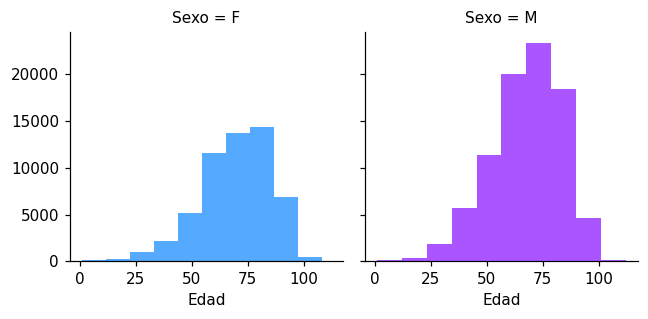

In [ ]:

sex_dist = sns.FacetGrid(fallecidos, col="Sexo", hue= "Sexo", palette = "cool")
sex_dist = sex_dist.map(plt.hist, "Edad")

Por otra parte, en el subgrupo de recuperados la población femenina haciende un 0.4% en comparación a la muestra total, siendo 53.8% de la población, mujeres.

In [ ]:
recuperados['Sexo'].value_counts()

F    3296581
M    2834667
Name: Sexo, dtype: int64

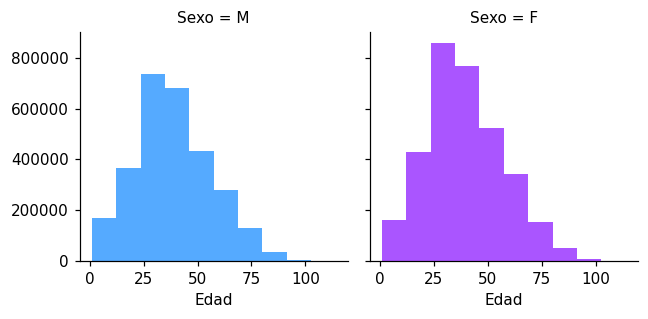

In [ ]:
sex_dist = sns.FacetGrid(recuperados, col="Sexo", hue= "Sexo", palette = "cool")
sex_dist = sex_dist.map(plt.hist, "Edad")

 
En el análisis realizado se puede observar, como es de conocimiento que la población vulnerable rodea los 70 años de edad, pues es a esta edad donde se concentran las muertes de las personas que han sido registradas como contagiadas. Aunque se podrían mantener algunos tipos de prevenciones en este sector de la población,  en el periodo en el que se registran los datos, los casos de fallecimientos son escasos en comparación a los recuperados por lo que no representa un riesgo de colapso.


***Pertenencia étnica**

Por último examinamos la cantidad de recuperados y fallecidos en cada uno de los cuatro grupos minoritarios.

In [ ]:
grupo1 = covidco_cpo_mayus.groupby('Pertenencia étnica').get_group(1)
grupo5 = covidco_cpo_mayus.groupby('Pertenencia étnica').get_group(5)
grupo3 = covidco_cpo_mayus.groupby('Pertenencia étnica').get_group(3)
grupo2 = covidco_cpo_mayus.groupby('Pertenencia étnica').get_group(2)

In [ ]:
grupo1['Recuperado'].value_counts()

RECUPERADO    80591
FALLECIDO      2278
NAN             468
ACTIVO           58
Name: Recuperado, dtype: int64

Esto es, en el grupo 1, de indígenas el 0.03% de la población contagiada falleció.


In [ ]:
grupo5['Recuperado'].value_counts()

RECUPERADO    133376
FALLECIDO       3537
NAN              609
ACTIVO            25
Name: Recuperado, dtype: int64

En el grupo 5, de negros el 0.02% de la población contagiada falleció.

In [ ]:
grupo3['Recuperado'].value_counts()

RECUPERADO    396
FALLECIDO       7
NAN             2
Name: Recuperado, dtype: int64

En el grupo 3, de población ROM el 0.02% de la población contagiada falleció.

In [ ]:
grupo2['Recuperado'].value_counts()

RECUPERADO    132
FALLECIDO       6
Name: Recuperado, dtype: int64

En el grupo 2, de palenqueros el 0.04% de la población contagiada falleció.

Por otra parte, para la población que no tiene pertenencia étnica, el grupo 6,  se obtienen estas mismas medidas.

In [ ]:
grupo6 = covidco_cpo_mayus.groupby('Pertenencia étnica').get_group(6)

In [ ]:
grupo6['Recuperado'].value_counts()

RECUPERADO    5916753
FALLECIDO      135880
NAN             26653
ACTIVO           3546
Name: Recuperado, dtype: int64

Siendo el 0.02% de este sector de la población, casos fallecidos. Con esto podríamos decir que los grupos minoritarios de indígenas y palenqueros son grupos con un mayor riesgo de fallecer tras haberse contagiado de COVID-19, sin embargo debido a el pequeño porcentaje que representan los casos fallecidos habría que hacer más estudios para probar esta hipótesis.

# Referencias



*   Datos.gov.co. 2022. Casos positivos de COVID-19 en Colombia. [online] Recuperado de: <https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr> [Accessed 10 September 2022].
*   Descripción general de vacunación en Colombia.Our World in Data. [online] Recuperado de: https://ourworldindata.org/covid-vaccinations?country=~COL#select-countries-to-show-in-all-charts

